In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (10,8)

## Exploratory Data Analysis

In [2]:
df_health = pd.read_csv("documents/datasets for data science/mental health/mental-health-twitter.csv")

df_health

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


<AxesSubplot:xlabel='label', ylabel='friends'>

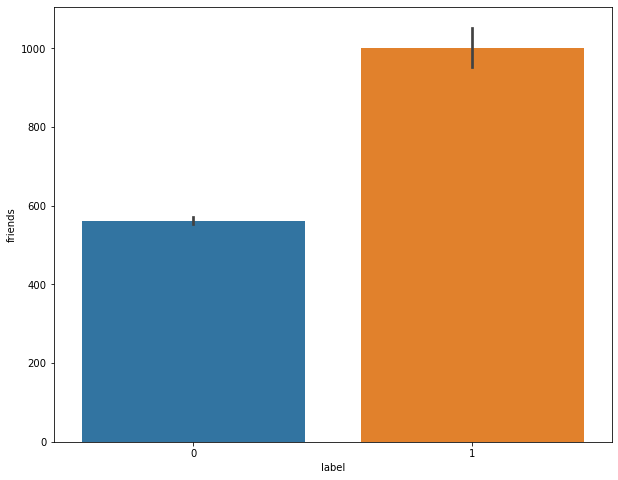

In [4]:
sns.barplot(y='friends',x='label',data=df_health)

People with more friends tend to be depressed more

<AxesSubplot:xlabel='label', ylabel='followers'>

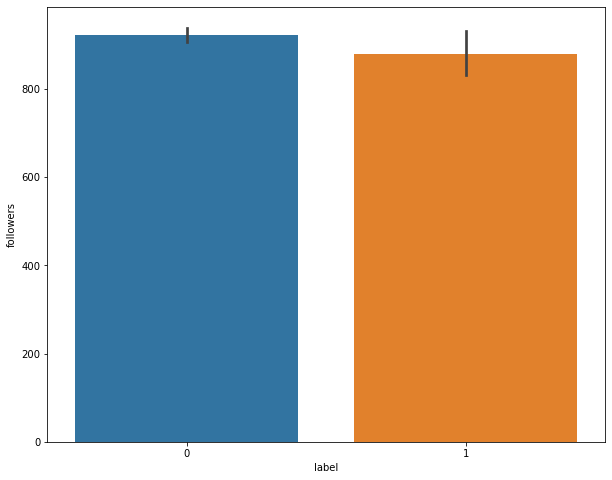

In [6]:
sns.barplot(y='followers',x='label',data=df_health)

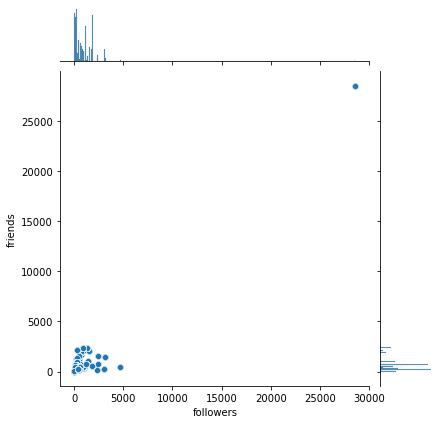

In [8]:
sns.jointplot('followers','friends',data=df_health)

As expected people with less followers have less friends

In [9]:
df_health.isna().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [10]:
df_health.retweets.unique() #not categorical

array([    0,     1,     2, ...,  3137,   346, 52249], dtype=int64)

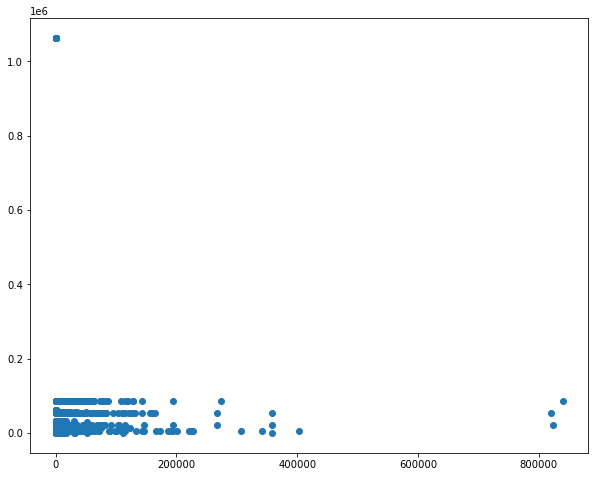

In [17]:
plt.scatter(data=df_health, x='retweets', y='statuses')

<AxesSubplot:>

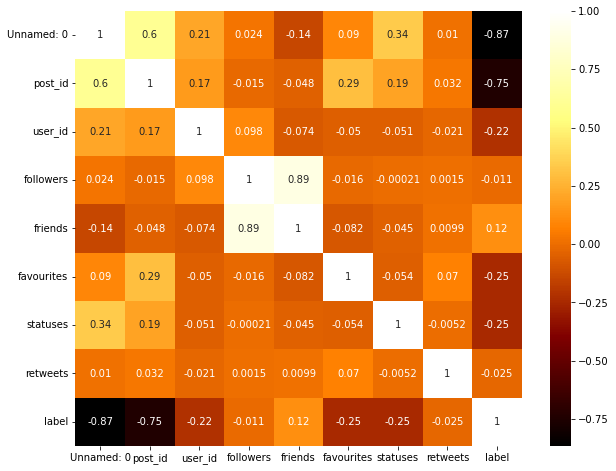

In [18]:
sns.heatmap(df_health.corr(),annot=True,cmap=plt.cm.afmhot)

friends and followers are very similar, but followers gives less info to predict label

## Feature Engineering

In [19]:
df_health

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [23]:
df_health.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [3]:
df_health.drop(columns=['post_id','Unnamed: 0'],inplace=True)
df_health.set_index('user_id',inplace=True)

In [25]:
df_health

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
user_id,,,,,,,,
1013187241,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1013187241,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
1013187241,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
1013187241,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
1013187241,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...
1169875706,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,442,230,7,1063601,0,0
1169875706,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0
1169875706,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0


In [4]:
df_health['post_created'] = pd.to_datetime(df_health['post_created'])

<AxesSubplot:xlabel='post_created'>

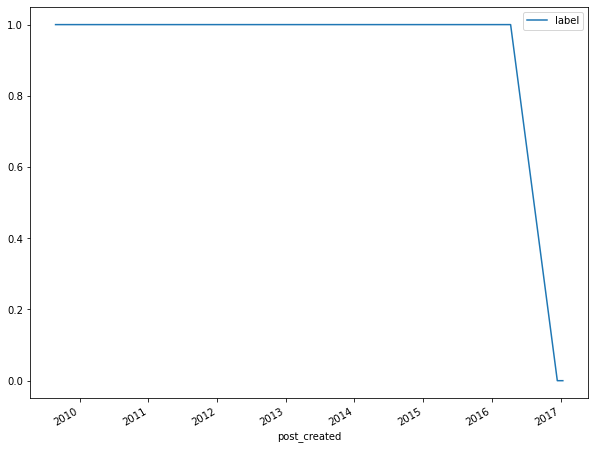

In [41]:
df_health[['post_created','label']].set_index('post_created').plot()

understanding from this : as time passes mental health awareness increases and is treated more hence the decline

In [55]:
df_health

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
user_id,,,,,,,,
1013187241,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1013187241,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
1013187241,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
1013187241,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
1013187241,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...
1169875706,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,442,230,7,1063601,0,0
1169875706,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0
1169875706,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0


In [3]:
paragraph = ''.join(df_health['post_text'])

In [4]:
re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", paragraph)

'It\'s just over 2 years since I was diagnosed with #anxiety and #depression. Today I\'m taking a moment to reflect on how far I\'ve come since.It\'s Sunday, I need a break, so I\'m planning to spend as little time as possible on the #A14...Awake but tired. I need to sleep but my brain has other ideas...RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October\'s Sew on sale NOW! #yay   hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxietyMaking packing lists is my new hobby... #movinghouseAt what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouseCurrently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...Can\'t be bothered to cook, take away on the way 😁👍🏼 #lazyRT @itventsnews: ITV releases promo video for the final series of Downton Abbey    ... also, I have too much stuff. Way, way 

In [7]:
sentences = nltk.sent_tokenize(paragraph)

In [119]:
sentences

["It's just over 2 years since I was diagnosed with #anxiety and #depression.",
 "Today I'm taking a moment to reflect on how far I've come since.It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...Awake but tired.",
 'I need to sleep but my brain has other ideas...RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too!',
 "Get stitching with October's Sew on sale NOW!",
 '#yay http://t.co/…It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxietyMaking packing lists is my new hobby... #movinghouseAt what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...?',
 '#movinghouseCurrently in the finding-boxes-of-random-shit packing phase.',
 "I think I’m a closet hoarder...Can't be bothered to cook, take away on the way 😁👍🏼 #lazyRT @itventsnews: ITV releases promo video for the final series of Downton Abbey http://t.co

In [8]:
df_health['positive_emoji'] = 0
df_health['neutral_emoji'] = 0
df_health['negative_emoji'] = 0


positive_emoji = ['❤️','❤','😍','♥️','😊','💕','👍','😂','🙌','🤑','💖','✨','😊','🎉','💞',
                  '😝','😈','😃','😁','😎','😘','💓','😉','😬','😄','😀','😜','💗','😌','😆',
                  '😛','😻','🙋','❣️','🙂','😇','💝','😏','😋','🤗','🙆','🤓','😚','😙','😸','😼','😺','😽']


neutral_emoji = ['🙏','💜','💙','👽','💛','💟','💚','😅','🙃','💩','😳','🙄','😑','🙇','🙎','😐','😶']


negative_emoji = ['💥','💘','😭','😱','👎','😫','😨','😢','💀','🤔','👻','😓','💦','😤','😩','😴','💔',
                  '😒','😪','😈','😣','😮','😡','😕','😔','😠','😷','😥','😞','😲','😰','🙀','😖','😧',
                  '😟','😹','😵','😶','😯','🤒','🤕','😾','💤']

In [9]:
emoji_rx = r"[#*0-9]\uFE0F?\u20E3|©\uFE0F?|[®\u203C\u2049\u2122\u2139\u2194-\u2199\u21A9\u21AA]\uFE0F?|[\u231A\u231B]|[\u2328\u23CF]\uFE0F?|[\u23E9-\u23EC]|[\u23ED-\u23EF]\uFE0F?|\u23F0|[\u23F1\u23F2]\uFE0F?|\u23F3|[\u23F8-\u23FA\u24C2\u25AA\u25AB\u25B6\u25C0\u25FB\u25FC]\uFE0F?|[\u25FD\u25FE]|[\u2600-\u2604\u260E\u2611]\uFE0F?|[\u2614\u2615]|\u2618\uFE0F?|\u261D[\uFE0F\U0001F3FB-\U0001F3FF]?|[\u2620\u2622\u2623\u2626\u262A\u262E\u262F\u2638-\u263A\u2640\u2642]\uFE0F?|[\u2648-\u2653]|[\u265F\u2660\u2663\u2665\u2666\u2668\u267B\u267E]\uFE0F?|\u267F|\u2692\uFE0F?|\u2693|[\u2694-\u2697\u2699\u269B\u269C\u26A0]\uFE0F?|\u26A1|\u26A7\uFE0F?|[\u26AA\u26AB]|[\u26B0\u26B1]\uFE0F?|[\u26BD\u26BE\u26C4\u26C5]|\u26C8\uFE0F?|\u26CE|[\u26CF\u26D1\u26D3]\uFE0F?|\u26D4|\u26E9\uFE0F?|\u26EA|[\u26F0\u26F1]\uFE0F?|[\u26F2\u26F3]|\u26F4\uFE0F?|\u26F5|[\u26F7\u26F8]\uFE0F?|\u26F9(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\u26FA\u26FD]|\u2702\uFE0F?|\u2705|[\u2708\u2709]\uFE0F?|[\u270A\u270B][\U0001F3FB-\U0001F3FF]?|[\u270C\u270D][\uFE0F\U0001F3FB-\U0001F3FF]?|\u270F\uFE0F?|[\u2712\u2714\u2716\u271D\u2721]\uFE0F?|\u2728|[\u2733\u2734\u2744\u2747]\uFE0F?|[\u274C\u274E\u2753-\u2755\u2757]|\u2763\uFE0F?|\u2764(?:\u200D[\U0001F525\U0001FA79]|\uFE0F(?:\u200D[\U0001F525\U0001FA79])?)?|[\u2795-\u2797]|\u27A1\uFE0F?|[\u27B0\u27BF]|[\u2934\u2935\u2B05-\u2B07]\uFE0F?|[\u2B1B\u2B1C\u2B50\u2B55]|[\u3030\u303D\u3297\u3299]\uFE0F?|[\U0001F004\U0001F0CF]|[\U0001F170\U0001F171\U0001F17E\U0001F17F]\uFE0F?|[\U0001F18E\U0001F191-\U0001F19A]|\U0001F1E6[\U0001F1E8-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F2\U0001F1F4\U0001F1F6-\U0001F1FA\U0001F1FC\U0001F1FD\U0001F1FF]|\U0001F1E7[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EF\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1E8[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1EE\U0001F1F0-\U0001F1F5\U0001F1F7\U0001F1FA-\U0001F1FF]|\U0001F1E9[\U0001F1EA\U0001F1EC\U0001F1EF\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1FF]|\U0001F1EA[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1ED\U0001F1F7-\U0001F1FA]|\U0001F1EB[\U0001F1EE-\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1F7]|\U0001F1EC[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EE\U0001F1F1-\U0001F1F3\U0001F1F5-\U0001F1FA\U0001F1FC\U0001F1FE]|\U0001F1ED[\U0001F1F0\U0001F1F2\U0001F1F3\U0001F1F7\U0001F1F9\U0001F1FA]|\U0001F1EE[\U0001F1E8-\U0001F1EA\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9]|\U0001F1EF[\U0001F1EA\U0001F1F2\U0001F1F4\U0001F1F5]|\U0001F1F0[\U0001F1EA\U0001F1EC-\U0001F1EE\U0001F1F2\U0001F1F3\U0001F1F5\U0001F1F7\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1F1[\U0001F1E6-\U0001F1E8\U0001F1EE\U0001F1F0\U0001F1F7-\U0001F1FB\U0001F1FE]|\U0001F1F2[\U0001F1E6\U0001F1E8-\U0001F1ED\U0001F1F0-\U0001F1FF]|\U0001F1F3[\U0001F1E6\U0001F1E8\U0001F1EA-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F4\U0001F1F5\U0001F1F7\U0001F1FA\U0001F1FF]|\U0001F1F4\U0001F1F2|\U0001F1F5[\U0001F1E6\U0001F1EA-\U0001F1ED\U0001F1F0-\U0001F1F3\U0001F1F7-\U0001F1F9\U0001F1FC\U0001F1FE]|\U0001F1F6\U0001F1E6|\U0001F1F7[\U0001F1EA\U0001F1F4\U0001F1F8\U0001F1FA\U0001F1FC]|\U0001F1F8[\U0001F1E6-\U0001F1EA\U0001F1EC-\U0001F1F4\U0001F1F7-\U0001F1F9\U0001F1FB\U0001F1FD-\U0001F1FF]|\U0001F1F9[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1ED\U0001F1EF-\U0001F1F4\U0001F1F7\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FF]|\U0001F1FA[\U0001F1E6\U0001F1EC\U0001F1F2\U0001F1F3\U0001F1F8\U0001F1FE\U0001F1FF]|\U0001F1FB[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1EE\U0001F1F3\U0001F1FA]|\U0001F1FC[\U0001F1EB\U0001F1F8]|\U0001F1FD\U0001F1F0|\U0001F1FE[\U0001F1EA\U0001F1F9]|\U0001F1FF[\U0001F1E6\U0001F1F2\U0001F1FC]|\U0001F201|\U0001F202\uFE0F?|[\U0001F21A\U0001F22F\U0001F232-\U0001F236]|\U0001F237\uFE0F?|[\U0001F238-\U0001F23A\U0001F250\U0001F251\U0001F300-\U0001F320]|[\U0001F321\U0001F324-\U0001F32C]\uFE0F?|[\U0001F32D-\U0001F335]|\U0001F336\uFE0F?|[\U0001F337-\U0001F37C]|\U0001F37D\uFE0F?|[\U0001F37E-\U0001F384]|\U0001F385[\U0001F3FB-\U0001F3FF]?|[\U0001F386-\U0001F393]|[\U0001F396\U0001F397\U0001F399-\U0001F39B\U0001F39E\U0001F39F]\uFE0F?|[\U0001F3A0-\U0001F3C1]|\U0001F3C2[\U0001F3FB-\U0001F3FF]?|[\U0001F3C3\U0001F3C4](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3C5\U0001F3C6]|\U0001F3C7[\U0001F3FB-\U0001F3FF]?|[\U0001F3C8\U0001F3C9]|\U0001F3CA(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CB\U0001F3CC](?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CD\U0001F3CE]\uFE0F?|[\U0001F3CF-\U0001F3D3]|[\U0001F3D4-\U0001F3DF]\uFE0F?|[\U0001F3E0-\U0001F3F0]|\U0001F3F3(?:\u200D(?:\u26A7\uFE0F?|\U0001F308)|\uFE0F(?:\u200D(?:\u26A7\uFE0F?|\U0001F308))?)?|\U0001F3F4(?:\u200D\u2620\uFE0F?|\U000E0067\U000E0062(?:\U000E0065\U000E006E\U000E0067|\U000E0073\U000E0063\U000E0074|\U000E0077\U000E006C\U000E0073)\U000E007F)?|[\U0001F3F5\U0001F3F7]\uFE0F?|[\U0001F3F8-\U0001F407]|\U0001F408(?:\u200D\u2B1B)?|[\U0001F409-\U0001F414]|\U0001F415(?:\u200D\U0001F9BA)?|[\U0001F416-\U0001F43A]|\U0001F43B(?:\u200D\u2744\uFE0F?)?|[\U0001F43C-\U0001F43E]|\U0001F43F\uFE0F?|\U0001F440|\U0001F441(?:\u200D\U0001F5E8\uFE0F?|\uFE0F(?:\u200D\U0001F5E8\uFE0F?)?)?|[\U0001F442\U0001F443][\U0001F3FB-\U0001F3FF]?|[\U0001F444\U0001F445]|[\U0001F446-\U0001F450][\U0001F3FB-\U0001F3FF]?|[\U0001F451-\U0001F465]|[\U0001F466\U0001F467][\U0001F3FB-\U0001F3FF]?|\U0001F468(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|[\U0001F468\U0001F469]\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F469(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?[\U0001F468\U0001F469]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|\U0001F469\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F46A|[\U0001F46B-\U0001F46D][\U0001F3FB-\U0001F3FF]?|\U0001F46E(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F46F(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F470\U0001F471](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F472[\U0001F3FB-\U0001F3FF]?|\U0001F473(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F474-\U0001F476][\U0001F3FB-\U0001F3FF]?|\U0001F477(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F478[\U0001F3FB-\U0001F3FF]?|[\U0001F479-\U0001F47B]|\U0001F47C[\U0001F3FB-\U0001F3FF]?|[\U0001F47D-\U0001F480]|[\U0001F481\U0001F482](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F483[\U0001F3FB-\U0001F3FF]?|\U0001F484|\U0001F485[\U0001F3FB-\U0001F3FF]?|[\U0001F486\U0001F487](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F488-\U0001F48E]|\U0001F48F[\U0001F3FB-\U0001F3FF]?|\U0001F490|\U0001F491[\U0001F3FB-\U0001F3FF]?|[\U0001F492-\U0001F4A9]|\U0001F4AA[\U0001F3FB-\U0001F3FF]?|[\U0001F4AB-\U0001F4FC]|\U0001F4FD\uFE0F?|[\U0001F4FF-\U0001F53D]|[\U0001F549\U0001F54A]\uFE0F?|[\U0001F54B-\U0001F54E\U0001F550-\U0001F567]|[\U0001F56F\U0001F570\U0001F573]\uFE0F?|\U0001F574[\uFE0F\U0001F3FB-\U0001F3FF]?|\U0001F575(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F576-\U0001F579]\uFE0F?|\U0001F57A[\U0001F3FB-\U0001F3FF]?|[\U0001F587\U0001F58A-\U0001F58D]\uFE0F?|\U0001F590[\uFE0F\U0001F3FB-\U0001F3FF]?|[\U0001F595\U0001F596][\U0001F3FB-\U0001F3FF]?|\U0001F5A4|[\U0001F5A5\U0001F5A8\U0001F5B1\U0001F5B2\U0001F5BC\U0001F5C2-\U0001F5C4\U0001F5D1-\U0001F5D3\U0001F5DC-\U0001F5DE\U0001F5E1\U0001F5E3\U0001F5E8\U0001F5EF\U0001F5F3\U0001F5FA]\uFE0F?|[\U0001F5FB-\U0001F62D]|\U0001F62E(?:\u200D\U0001F4A8)?|[\U0001F62F-\U0001F634]|\U0001F635(?:\u200D\U0001F4AB)?|\U0001F636(?:\u200D\U0001F32B\uFE0F?)?|[\U0001F637-\U0001F644]|[\U0001F645-\U0001F647](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F648-\U0001F64A]|\U0001F64B(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64C[\U0001F3FB-\U0001F3FF]?|[\U0001F64D\U0001F64E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64F[\U0001F3FB-\U0001F3FF]?|[\U0001F680-\U0001F6A2]|\U0001F6A3(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6A4-\U0001F6B3]|[\U0001F6B4-\U0001F6B6](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6B7-\U0001F6BF]|\U0001F6C0[\U0001F3FB-\U0001F3FF]?|[\U0001F6C1-\U0001F6C5]|\U0001F6CB\uFE0F?|\U0001F6CC[\U0001F3FB-\U0001F3FF]?|[\U0001F6CD-\U0001F6CF]\uFE0F?|[\U0001F6D0-\U0001F6D2\U0001F6D5-\U0001F6D7\U0001F6DD-\U0001F6DF]|[\U0001F6E0-\U0001F6E5\U0001F6E9]\uFE0F?|[\U0001F6EB\U0001F6EC]|[\U0001F6F0\U0001F6F3]\uFE0F?|[\U0001F6F4-\U0001F6FC\U0001F7E0-\U0001F7EB\U0001F7F0]|\U0001F90C[\U0001F3FB-\U0001F3FF]?|[\U0001F90D\U0001F90E]|\U0001F90F[\U0001F3FB-\U0001F3FF]?|[\U0001F910-\U0001F917]|[\U0001F918-\U0001F91F][\U0001F3FB-\U0001F3FF]?|[\U0001F920-\U0001F925]|\U0001F926(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F927-\U0001F92F]|[\U0001F930-\U0001F934][\U0001F3FB-\U0001F3FF]?|\U0001F935(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F936[\U0001F3FB-\U0001F3FF]?|[\U0001F937-\U0001F939](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F93A|\U0001F93C(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F93D\U0001F93E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F93F-\U0001F945\U0001F947-\U0001F976]|\U0001F977[\U0001F3FB-\U0001F3FF]?|[\U0001F978-\U0001F9B4]|[\U0001F9B5\U0001F9B6][\U0001F3FB-\U0001F3FF]?|\U0001F9B7|[\U0001F9B8\U0001F9B9](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9BA|\U0001F9BB[\U0001F3FB-\U0001F3FF]?|[\U0001F9BC-\U0001F9CC]|[\U0001F9CD-\U0001F9CF](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D0|\U0001F9D1(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FC-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FE]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|[\U0001F9D2\U0001F9D3][\U0001F3FB-\U0001F3FF]?|\U0001F9D4(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D5[\U0001F3FB-\U0001F3FF]?|[\U0001F9D6-\U0001F9DD](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F9DE\U0001F9DF](?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F9E0-\U0001F9FF\U0001FA70-\U0001FA74\U0001FA78-\U0001FA7C\U0001FA80-\U0001FA86\U0001FA90-\U0001FAAC\U0001FAB0-\U0001FABA\U0001FAC0-\U0001FAC2]|[\U0001FAC3-\U0001FAC5][\U0001F3FB-\U0001F3FF]?|[\U0001FAD0-\U0001FAD9\U0001FAE0-\U0001FAE7]|\U0001FAF0[\U0001F3FB-\U0001F3FF]?|\U0001FAF1(?:\U0001F3FB(?:\u200D\U0001FAF2[\U0001F3FC-\U0001F3FF])?|\U0001F3FC(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FD-\U0001F3FF])?|\U0001F3FD(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF])?|\U0001F3FE(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FD\U0001F3FF])?|\U0001F3FF(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FE])?)?|[\U0001FAF2-\U0001FAF6][\U0001F3FB-\U0001F3FF]?"

extract_emoji = re.compile(emoji_rx)

In [10]:
df_health.reset_index(inplace=True)

In [11]:
for idx, text in enumerate(df_health['post_text']):
    tmp = extract_emoji.findall(text)   # generates a list of emoji's present in the post
    
    for emoji in tmp:
        if emoji in positive_emoji:
            df_health.at[idx, 'positive_emoji'] += 1
        elif emoji in negative_emoji:
            df_health.at[idx, 'negative_emoji'] += 1
        else:
            df_health.at[idx, 'neutral_emoji'] += 1

In [92]:
df_health.set_index('user_id',inplace=True)

In [93]:
df_health

,post_created,post_text,followers,friends,favourites,statuses,retweets,label,positive_emoji,neutral_emoji,negative_emoji
user_id,,,,,,,,,,,
1013187241,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,0,0,0
1013187241,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,0,0,0
1013187241,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,0,0,0
1013187241,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,0,0,0
1013187241,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1169875706,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,442,230,7,1063601,0,0,0,0,0
1169875706,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,0,0,0
1169875706,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,0,0,0


In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
corpus =[]
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review= [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review = ' '.join(review)
    corpus.append(review)

In [121]:
corpus

['year since diagnosed anxiety depression',
 'today taking moment reflect far come since sunday need break planning spend little time possible awake tired',
 'need sleep brain idea rt sewhq retro bear make perfect gift great beginner',
 'get stitching october sew sale',
 'yay http co hard say whether packing list making life easier reinforcing much still need movinghouse anxietymaking packing list new hobby movinghouseat point keeping stuff nostalgic reason cross line plain old hoarding',
 'movinghousecurrently finding box random shit packing phase',
 'think closet hoarder bothered cook take away way lazyrt itventsnews itv release promo video final series downton abbey http co mc ive zr http co cfbkrrvjis also much stuff',
 'way way much movinghousei never want put one together lotharderthanitlooks http co ujltcklbmoving stuff bloomin knackering still load back house moving stuff',
 'peaceful',
 'urgh',
 'anxiety',
 'ffs come',
 'breathe much stuff',
 'way way much',
 'massive purge wa

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

cv_sparse = cv.fit_transform(corpus)
tfid_sparse = tfidf.fit_transform(corpus)

In [124]:
cv.vocabulary_

{'year': 33633,
 'since': 26592,
 'diagnosed': 6860,
 'anxiety': 1187,
 'depression': 6654,
 'today': 29474,
 'taking': 28477,
 'moment': 18874,
 'reflect': 24337,
 'far': 9212,
 'come': 5094,
 'sunday': 28069,
 'need': 19667,
 'break': 3372,
 'planning': 22380,
 'spend': 27376,
 'little': 16844,
 'time': 29297,
 'possible': 22675,
 'awake': 1808,
 'tired': 29334,
 'sleep': 26790,
 'brain': 3341,
 'idea': 13236,
 'rt': 25259,
 'sewhq': 26167,
 'retro': 24649,
 'bear': 2392,
 'make': 17649,
 'perfect': 22011,
 'gift': 10852,
 'great': 11339,
 'beginner': 2451,
 'get': 10762,
 'stitching': 27773,
 'october': 20673,
 'sew': 26163,
 'sale': 25557,
 'yay': 33550,
 'http': 12889,
 'co': 4976,
 'hard': 11859,
 'say': 25706,
 'whether': 32306,
 'packing': 21583,
 'list': 16819,
 'making': 17656,
 'life': 16676,
 'easier': 7918,
 'reinforcing': 24391,
 'much': 19175,
 'still': 27757,
 'movinghouse': 19040,
 'anxietymaking': 1192,
 'new': 19744,
 'hobby': 12579,
 'movinghouseat': 19041,
 'point'

In [125]:
tfidf.vocabulary_

{'year': 33633,
 'since': 26592,
 'diagnosed': 6860,
 'anxiety': 1187,
 'depression': 6654,
 'today': 29474,
 'taking': 28477,
 'moment': 18874,
 'reflect': 24337,
 'far': 9212,
 'come': 5094,
 'sunday': 28069,
 'need': 19667,
 'break': 3372,
 'planning': 22380,
 'spend': 27376,
 'little': 16844,
 'time': 29297,
 'possible': 22675,
 'awake': 1808,
 'tired': 29334,
 'sleep': 26790,
 'brain': 3341,
 'idea': 13236,
 'rt': 25259,
 'sewhq': 26167,
 'retro': 24649,
 'bear': 2392,
 'make': 17649,
 'perfect': 22011,
 'gift': 10852,
 'great': 11339,
 'beginner': 2451,
 'get': 10762,
 'stitching': 27773,
 'october': 20673,
 'sew': 26163,
 'sale': 25557,
 'yay': 33550,
 'http': 12889,
 'co': 4976,
 'hard': 11859,
 'say': 25706,
 'whether': 32306,
 'packing': 21583,
 'list': 16819,
 'making': 17656,
 'life': 16676,
 'easier': 7918,
 'reinforcing': 24391,
 'much': 19175,
 'still': 27757,
 'movinghouse': 19040,
 'anxietymaking': 1192,
 'new': 19744,
 'hobby': 12579,
 'movinghouseat': 19041,
 'point'

In [15]:
tfid_sparse[0][tfid_sparse[0].toarray() != 0]

matrix([[0.4827428 , 0.40653501, 0.50381421, 0.46387587, 0.36425142]])

In [137]:
df_health

,post_created,post_text,followers,friends,favourites,statuses,retweets,label,positive_emoji,neutral_emoji,negative_emoji
user_id,,,,,,,,,,,
1013187241,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,0,0,0
1013187241,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,0,0,0
1013187241,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,0,0,0
1013187241,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,0,0,0
1013187241,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1169875706,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,442,230,7,1063601,0,0,0,0,0
1169875706,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,0,0,0
1169875706,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,0,0,0


In [15]:
df = df_health.drop(columns = ['post_text','user_id','post_created'])
df

,followers,friends,favourites,statuses,retweets,label,positive_emoji,neutral_emoji,negative_emoji
0,84,211,251,837,0,1,0,0,0
1,84,211,251,837,1,1,0,0,0
2,84,211,251,837,0,1,0,0,0
3,84,211,251,837,2,1,0,0,0
4,84,211,251,837,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,442,230,7,1063601,0,0,0,0,0
19996,442,230,7,1063601,0,0,0,0,0
19997,442,230,7,1063601,0,0,0,0,0
19998,442,230,7,1063601,0,0,0,0,0


In [147]:
cv_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [153]:
# cv_sparse_df = pd.DataFrame(cv_sparse.toarray(),columns=cv.vocabulary_)

In [154]:
#tfid_sparse_df = pd.DataFrame(tfid_sparse.toarray(),columns=tfidf.vocabulary_)

## Feature Selection

In [16]:
#df_health.reset_index(inplace=True)
X = df.drop(columns='label')
y=df.label

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

tfidf_train,tfidf_test,ytfidf_train,ytfidf_test = train_test_split(tfid_sparse,y[:13607],test_size=0.2,random_state=0)

In [33]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif

var_threshold = VarianceThreshold(0.1)
var_threshold.fit(X_train)
mutual_info = mutual_info_classif(X_train,y_train)

In [36]:
X_train.columns

Index(['followers', 'friends', 'favourites', 'statuses', 'retweets',
       'positive_emoji', 'neutral_emoji', 'negative_emoji'],
      dtype='object')

In [37]:
var_cols = [col for col in X_train.columns if col not in X_train.columns[var_threshold.get_support()]]

In [38]:
var_cols

['negative_emoji']

No way i'm dropping this, went through stress to get it

<AxesSubplot:>

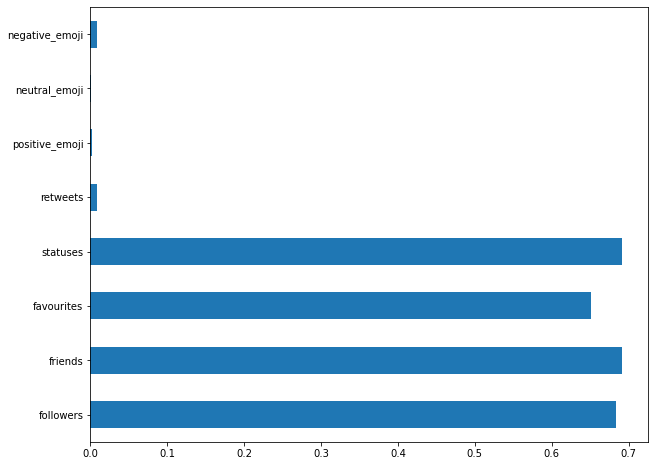

In [42]:
mutual = pd.Series(mutual_info, index=X_train.columns)
mutual.plot(kind='barh')

i'll create models with and without them

In [19]:
Xmod_train = X_train.drop(columns=['neutral_emoji','positive_emoji','retweets','negative_emoji'])
Xmod_test = X_test.drop(columns=['neutral_emoji','positive_emoji','retweets','negative_emoji'])

seperate data without low info columns

## Algorithm Training and Model Building

In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report,recall_score


decisionT = DecisionTreeClassifier()
randomF = RandomForestClassifier()
decisionTmod = DecisionTreeClassifier()
randomFmod = RandomForestClassifier()


decisionTtrain = decisionT.fit(X_train,y_train)
decisionTmod = decisionTmod.fit(Xmod_train,y_train)
randomF.fit(X_train,y_train)
randomFmod.fit(Xmod_train,y_train)
ypredT_train= decisionT.predict(X_train)
ypredT_mod = decisionTmod.predict(Xmod_train)
ypredT_test= decisionT.predict(X_test)
ypredT_modtest = decisionTmod.predict(Xmod_test)
ypredF_train = randomF.predict(X_train)
ypredF_mod = randomFmod.predict(Xmod_train)
ypredF_test = randomF.predict(X_test)
ypredF_modtest = randomFmod.predict(Xmod_test)

print("X-train")
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_train)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_test)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_train,ypredF_train)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_test)}')
print()
print('==========================================================================')
print('X-mod')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_mod)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_modtest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_train,ypredF_mod)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_modtest)}')

X-train
--------
accuracy score decision tree train : 1.0
accuracy score decision tree test : 1.0
---------------------------------------------------------------------------
accuracy score random forest test : 1.0
accuracy score random forest test : 1.0

X-mod
--------
accuracy score decision tree train : 1.0
accuracy score decision tree test : 1.0
---------------------------------------------------------------------------
accuracy score random forest test : 1.0
accuracy score random forest test : 1.0


In [21]:
print("X-train")
print('--------')
print(f'f1 score decision tree train : {f1_score(y_train,ypredT_train)}')
print(f'f1 score score decision tree test : {f1_score(y_test,ypredT_test)}')
print('---------------------------------------------------------------------------')
print(f'f1 score score random forest test : {f1_score(y_train,ypredF_train)}')
print(f'f1 score score random forest test : {f1_score(y_test,ypredF_test)}')
print()
print('==========================================================================')
print('X-mod')
print('--------')
print(f'f1 score score decision tree train : {f1_score(y_train,ypredT_mod)}')
print(f'f1 score score decision tree test : {f1_score(y_test,ypredT_modtest)}')
print('---------------------------------------------------------------------------')
print(f'f1 score score random forest test : {f1_score(y_train,ypredF_mod)}')
print(f'f1 score score random forest test : {f1_score(y_test,ypredF_modtest)}')

X-train
--------
f1 score decision tree train : 1.0
f1 score score decision tree test : 1.0
---------------------------------------------------------------------------
f1 score score random forest test : 1.0
f1 score score random forest test : 1.0

X-mod
--------
f1 score score decision tree train : 1.0
f1 score score decision tree test : 1.0
---------------------------------------------------------------------------
f1 score score random forest test : 1.0
f1 score score random forest test : 1.0


In [27]:
decisionT.fit(tfidf_train,ytfidf_train)
randomF.fit(tfidf_train,ytfidf_train)
ypredT_tfdiftest = decisionT.predict(tfidf_test)
ypredF_tfidftest = randomF.predict(tfidf_test)

# print('Tfidf')
# print('--------')
# print(f'accuracy score decision tree train : {accuracy_score(ytfidf_train,ypredT_tfidf)}')
# print(f'accuracy score decision tree test : {accuracy_score(ytfidf_test,ypredT_tfidftest)}')
# print('---------------------------------------------------------------------------')
# print(f'accuracy score random forest test : {accuracy_score(ytfidf_train,ypredF_tfidf)}')
# print(f'accuracy score random forest test : {accuracy_score(ytfidf_test,ypredF_tfidftest)}')

In [26]:
ypredT_tfidf = decisionT.predict(tfidf_train)
ypredF_tfidf = randomF.predict(tfidf_train)
ypredT_tfidftest = decisionT.predict(tfidf_test)
ypredF_tfidftest = randomF.predict(tfidf_test)

print('Tfidf')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(ytfidf_train,ypredT_tfidf)}')
print(f'accuracy score decision tree test : {accuracy_score(ytfidf_test,ypredT_tfidftest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(ytfidf_train,ypredF_tfidf)}')
print(f'accuracy score random forest test : {accuracy_score(ytfidf_test,ypredF_tfidftest)}')

Tfidf
--------
accuracy score decision tree train : 0.9893431327514929
accuracy score decision tree test : 0.8056576047024246
---------------------------------------------------------------------------
accuracy score random forest test : 0.9893431327514929
accuracy score random forest test : 0.8137398971344599


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report,recall_score



print("X-train")
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_train)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_test)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_tain,ypredF_train)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_test)}')
print()
print('==========================================================================')
print('X-mod')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_mod)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_modtest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_tain,ypredF_mod)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_modtest)}')
print()
print('==========================================================================')
print('Tfidf')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_tfidf)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_tfidftest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_tain,ypredF_tfidf)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_tfidftest)}')

## Hyperparameter Tuning

In [29]:
params = {'n_estimators' : [100,150,200,300,350],'max_depth':[5,8,10,15,20,25,30,50],
          'min_samples_split':[2,5,8,10,15,20,30,35],'min_samples_leaf':[1,4,6,8,10,13,15,18]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

randomCV = RandomizedSearchCV(estimator=randomF,param_distributions=params,n_jobs=-1,verbose=True)
randomCV.fit(tfidf_train,ytfidf_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, 20, 25, 30,
                                                      50],
                                        'min_samples_leaf': [1, 4, 6, 8, 10, 13,
                                                             15, 18],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20, 30, 35],
                                        'n_estimators': [100, 150, 200, 300,
                                                         350]},
                   verbose=True)

In [33]:
randomCV.best_params_

{'n_estimators': 350,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 20}

In [39]:
params_grid = {'n_estimators' : [200,300,310,325,350],'max_depth':[15,20,25,30]}

In [40]:
from sklearn.model_selection import GridSearchCV

gridCV = GridSearchCV(estimator=randomF,param_grid=params_grid,n_jobs=-1,verbose=True,)
gridCV.fit(tfidf_train,ytfidf_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 